Forward-Backward Greedy Algorithms for General Convex Smooth Functions over A Cardinality Constraint

## Experiments on Logistic Regression

### Data generation

* n: 100
* p: 500
* $s^*$: from 5 to 14
* $\beta^*$ ~ Uniform(0,1) whose norm is normalized to 5
* x ~ N($\beta^*$, I), take the opposite number for half of samples 
* $y\in \{-1,1\}$
* $P(y=1) = \frac{1}{1+\exp^{-x^T\beta^*}}$

### setting

* repeat: 50
* objective function: $f(\beta)= <\log(1+\exp(-yx^T\beta))>_n + \frac{0.01}{2}\|\beta\|^2$
* sparsity level: true

### metric

* F-measure: TP / (TP + FP/2 + FN/2)
* estimation error: $\frac{\|\hat{\beta} - \beta^*\|}{\|\beta^*\|}$
* objective value
* $|supp(\hat{\beta})|$

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Foba_OMP.csv")

In [10]:
metries = ['F_score', 'estimation_error', 'loss', 'sparsity']
df_grouped = df.groupby(['s', 'method'])[metries].mean().reset_index()

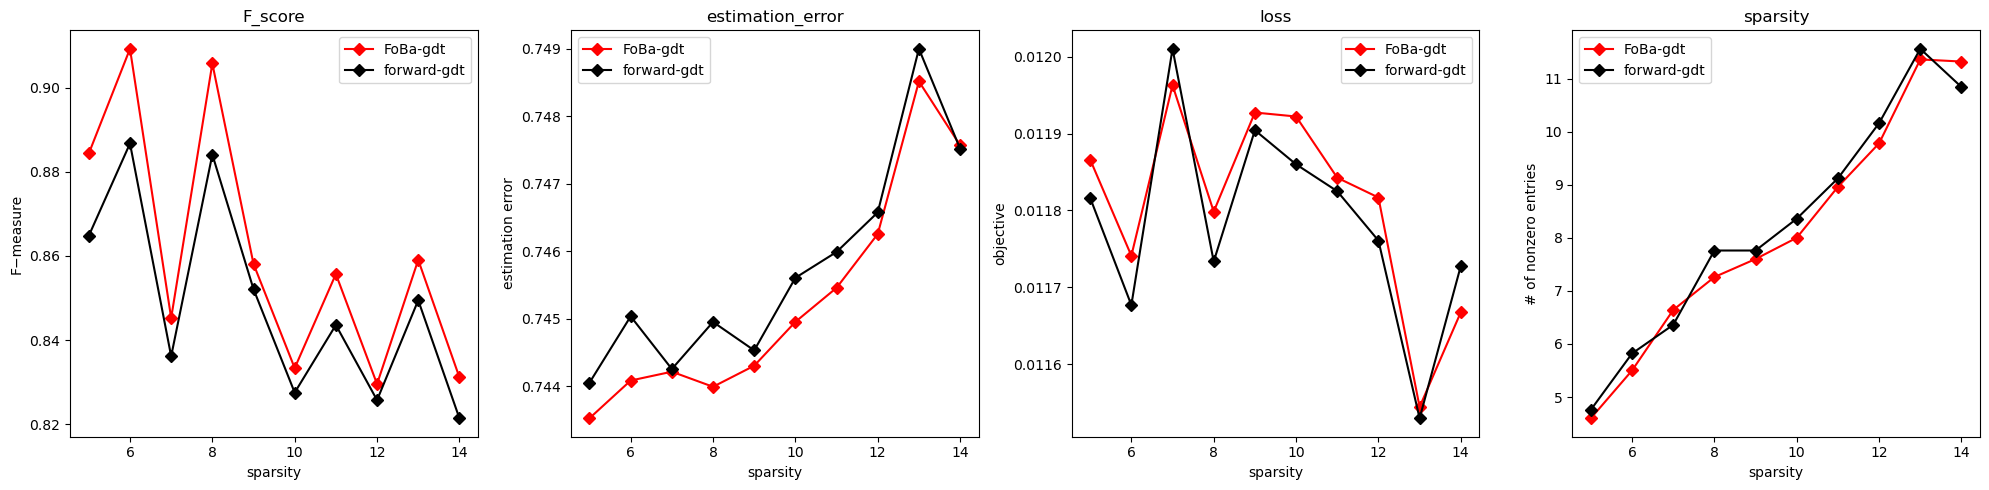

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i, metric in enumerate(metries):
    ax = axs[i]
    ax.set_title(metric)
    ax.set_xlabel("sparsity")
    if metric == 'F_score':
        ax.set_ylabel("F−measure")
    elif metric == 'loss':
        ax.set_ylabel("objective")
    elif metric == 'sparsity':
        ax.set_ylabel("# of nonzero entries")
    elif metric == 'estimation_error':
        ax.set_ylabel("estimation error")

    for j, method in enumerate(df_grouped['method'].unique()):
        df_plot = df_grouped[df_grouped['method'] == method]
        if method == "foba_gdt":
            ax.plot(df_plot['s'], df_plot[metric], marker='D', color='red', label='FoBa-gdt')
        elif method == "omp":
            ax.plot(df_plot['s'], df_plot[metric], marker='D', color='black', label='forward-gdt')

    ax.legend()

plt.tight_layout()
plt.show()
